In [1]:

# NutriGreen Dataset - YOLOv5 Training with GPU
# Run this notebook after completing EDA

import torch
import os
from pathlib import Path
import yaml
import subprocess
import sys

print("=" * 80)
print("NUTRIGREEN YOLOV5 TRAINING")
print("=" * 80)

NUTRIGREEN YOLOV5 TRAINING


In [2]:
# ============================================================================
# 1. CHECK GPU AVAILABILITY
# ============================================================================
print("\n" + "=" * 80)
print("GPU CHECK")
print("=" * 80)

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU Device: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")
    device = 'cuda'
else:
    print("WARNING: CUDA not available. Training will use CPU (much slower)")
    device = 'cpu'


GPU CHECK
PyTorch version: 2.5.1
CUDA available: True
CUDA version: 12.1
GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU
GPU Memory: 6.00 GB


In [5]:
# ============================================================================
# 2. SETUP PATHS
# ============================================================================
print("\n" + "=" * 80)
print("SETUP")
print("=" * 80)

BASE_DIR = Path(r"C:\Users\lokes\Desktop\ironhack\final_project\dataset\dataset")
YOLO_DIR = BASE_DIR / "yolov5_data"
CONFIG_FILE = YOLO_DIR / "nutrigreen.yaml"
YOLO_REPO = BASE_DIR / "yolov5"

print(f"Dataset directory: {YOLO_DIR}")
print(f"Config file: {CONFIG_FILE}")
print(f"YOLOv5 repo: {YOLO_REPO}")


SETUP
Dataset directory: C:\Users\lokes\Desktop\ironhack\final_project\dataset\dataset\yolov5_data
Config file: C:\Users\lokes\Desktop\ironhack\final_project\dataset\dataset\yolov5_data\nutrigreen.yaml
YOLOv5 repo: C:\Users\lokes\Desktop\ironhack\final_project\dataset\dataset\yolov5


In [6]:
# ============================================================================
# 3. CLONE YOLOV5 REPOSITORY (IF NOT EXISTS)
# ============================================================================
print("\n" + "=" * 80)
print("YOLOV5 REPOSITORY")
print("=" * 80)

if not YOLO_REPO.exists():
    print("Cloning YOLOv5 repository...")
    os.chdir(BASE_DIR)
    subprocess.run(['git', 'clone', 'https://github.com/ultralytics/yolov5.git'], check=True)
    print("✓ YOLOv5 repository cloned successfully")
else:
    print("✓ YOLOv5 repository already exists")

# Install requirements
print("\nInstalling/verifying YOLOv5 requirements...")
os.chdir(YOLO_REPO)
subprocess.run([sys.executable, '-m', 'pip', 'install', '-r', 'requirements.txt', '-q'], check=True)
print("✓ Requirements installed")


YOLOV5 REPOSITORY
✓ YOLOv5 repository already exists

Installing/verifying YOLOv5 requirements...
✓ Requirements installed


In [8]:

# ============================================================================
# 4. VERIFY DATASET STRUCTURE
# ============================================================================
print("\n" + "=" * 80)
print("DATASET VERIFICATION")
print("=" * 80)

# Count files
train_images = len(list((YOLO_DIR / 'train' / 'images').glob('*.jpg')))
train_labels = len(list((YOLO_DIR / 'train' / 'labels').glob('*.txt')))
val_images = len(list((YOLO_DIR / 'val' / 'images').glob('*.jpg')))
val_labels = len(list((YOLO_DIR / 'val' / 'labels').glob('*.txt')))
test_images = len(list((YOLO_DIR / 'test' / 'images').glob('*.jpg')))
test_labels = len(list((YOLO_DIR / 'test' / 'labels').glob('*.txt')))

print(f"\nDataset files:")
print(f"  Train: {train_images} images, {train_labels} labels")
print(f"  Val:   {val_images} images, {val_labels} labels")
print(f"  Test:  {test_images} images, {test_labels} labels")

if train_images == 0 or val_images == 0:
    print("\n❌ ERROR: No training or validation data found!")
    print("Please run the EDA notebook first to prepare the data.")
    sys.exit(1)

print("\n✓ Dataset structure verified")


DATASET VERIFICATION

Dataset files:
  Train: 5089 images, 5089 labels
  Val:   1090 images, 1090 labels
  Test:  1092 images, 1092 labels

✓ Dataset structure verified


In [15]:
# ============================================================================
# 5. TRAINING CONFIGURATION
# ============================================================================
print("\n" + "=" * 80)
print("TRAINING CONFIGURATION")
print("=" * 80)

# Training parameters
EPOCHS = 50
BATCH_SIZE = 8  # Adjust based on your GPU memory
IMG_SIZE = 640
MODEL_SIZE = 'yolov5s'  # Options: yolov5n, yolov5s, yolov5m, yolov5l, yolov5x
WORKERS = 2  # Number of dataloader workers

# Create runs directory
RUNS_DIR = BASE_DIR / "runs"
RUNS_DIR.mkdir(exist_ok=True)

config = {
    'epochs': EPOCHS,
    'batch_size': BATCH_SIZE,
    'img_size': IMG_SIZE,
    'model': MODEL_SIZE,
    'device': device,
    'workers': WORKERS,
    'project': str(RUNS_DIR),
    'name': 'nutrigreen_exp',
    'exist_ok': True
}

print(f"\nTraining Configuration:")
for key, value in config.items():
    print(f"  {key:<12}: {value}")


TRAINING CONFIGURATION

Training Configuration:
  epochs      : 50
  batch_size  : 8
  img_size    : 640
  model       : yolov5s
  device      : 0
  workers     : 2
  project     : C:\Users\lokes\Desktop\ironhack\final_project\dataset\dataset\runs
  name        : nutrigreen_exp
  exist_ok    : True


In [12]:
# Check CUDA availability
import torch
print(f"\nCUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    device = 'cuda'
else:
    print("⚠️  CUDA not available - using CPU (training will be slower)")
    device = 'cpu'


CUDA available: True
GPU: NVIDIA GeForce RTX 3060 Laptop GPU


In [ ]:
# ============================================================================
# 6. START TRAINING
# ============================================================================
print("\n" + "=" * 80)
print("STARTING TRAINING")
print("=" * 80)
print("\nThis may take several hours depending on your GPU and dataset size...")
print("Training logs will be saved to:", RUNS_DIR / 'nutrigreen_exp')

# Check CUDA availability
import torch
print(f"\n✓ CUDA available: {torch.cuda.is_available()}")
print(f"✓ GPU: {torch.cuda.get_device_name(0)}")
print(f"✓ CUDA version: {torch.version.cuda}")

device = '0'  # Use first GPU (index 0)

# Build training command
train_cmd = [
    sys.executable,
    'train.py',
    '--img', str(IMG_SIZE),
    '--batch', str(BATCH_SIZE),
    '--epochs', str(EPOCHS),
    '--data', str(CONFIG_FILE),
    '--weights', f'{MODEL_SIZE}.pt',
    '--device', device,  # Use '0' instead of 'cuda'
    '--workers', str(WORKERS),
    '--project', str(RUNS_DIR),
    '--name', 'nutrigreen_exp',
    '--exist-ok',
    '--cache', 
    '--patience', '8',
    '--save-period', '5'
]

print(f"\nExecuting command:")
print(' '.join(train_cmd))
print("\n" + "-" * 80)

# Run training
try:
    result = subprocess.run(train_cmd, cwd=YOLO_REPO, check=True, 
                          stdout=subprocess.PIPE, stderr=subprocess.STDOUT, 
                          text=True)
    
    # Print output
    print(result.stdout)
    
    print("\n" + "=" * 80)
    print("✓ TRAINING COMPLETED SUCCESSFULLY!")
    print("=" * 80)
    
except subprocess.CalledProcessError as e:
    print(f"\n❌ Training failed with error:")
    print(e.stdout)
    sys.exit(1)
from pathlib import Path


STARTING TRAINING

This may take several hours depending on your GPU and dataset size...
Training logs will be saved to: C:\Users\lokes\Desktop\ironhack\final_project\dataset\dataset\runs\nutrigreen_exp

✓ CUDA available: True
✓ GPU: NVIDIA GeForce RTX 3060 Laptop GPU
✓ CUDA version: 12.1

Executing command:
c:\anaconda\envs\ironhack\python.exe train.py --img 640 --batch 8 --epochs 50 --data C:\Users\lokes\Desktop\ironhack\final_project\dataset\dataset\yolov5_data\nutrigreen.yaml --weights yolov5s.pt --device 0 --workers 2 --project C:\Users\lokes\Desktop\ironhack\final_project\dataset\dataset\runs --name nutrigreen_exp --exist-ok --cache --patience 8 --save-period 5

--------------------------------------------------------------------------------

❌ Training failed with error:
train: weights=yolov5s.pt, cfg=, data=C:\Users\lokes\Desktop\ironhack\final_project\dataset\dataset\yolov5_data\nutrigreen.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=8, imgsz=640, rect=Fals

SystemExit: 1

In [17]:
# ============================================================================
# 7. TRAINING RESULTS
# ============================================================================
print("\n" + "=" * 80)
print("TRAINING RESULTS")
print("=" * 80)

exp_dir = RUNS_DIR / 'nutrigreen_exp'
weights_dir = exp_dir / 'weights'

print(f"\nResults saved to: {exp_dir}")
print(f"\nGenerated files:")
print(f"  • Best weights:  {weights_dir / 'best.pt'}")
print(f"  • Last weights:  {weights_dir / 'last.pt'}")
print(f"  • Results CSV:   {exp_dir / 'results.csv'}")
print(f"  • Training plots: {exp_dir}")

# Check if results exist
if (exp_dir / 'results.csv').exists():
    import pandas as pd
    results = pd.read_csv(exp_dir / 'results.csv')
    results.columns = results.columns.str.strip()
    
    print(f"\n✓ Training completed for {len(results)} epochs")
    print(f"\nFinal metrics (last epoch):")
    print(f"  Precision:  {results['metrics/precision'].iloc[-1]:.4f}")
    print(f"  Recall:     {results['metrics/recall'].iloc[-1]:.4f}")
    print(f"  mAP@0.5:    {results['metrics/mAP_0.5'].iloc[-1]:.4f}")
    print(f"  mAP@0.5:0.95: {results['metrics/mAP_0.5:0.95'].iloc[-1]:.4f}")
    
    # Find best epoch
    best_epoch = results['metrics/mAP_0.5'].idxmax()
    print(f"\nBest performance at epoch {best_epoch + 1}:")
    print(f"  Precision:  {results['metrics/precision'].iloc[best_epoch]:.4f}")
    print(f"  Recall:     {results['metrics/recall'].iloc[best_epoch]:.4f}")
    print(f"  mAP@0.5:    {results['metrics/mAP_0.5'].iloc[best_epoch]:.4f}")
    print(f"  mAP@0.5:0.95: {results['metrics/mAP_0.5:0.95'].iloc[best_epoch]:.4f}")


TRAINING RESULTS

Results saved to: C:\Users\lokes\Desktop\ironhack\final_project\dataset\dataset\runs\nutrigreen_exp

Generated files:
  • Best weights:  C:\Users\lokes\Desktop\ironhack\final_project\dataset\dataset\runs\nutrigreen_exp\weights\best.pt
  • Last weights:  C:\Users\lokes\Desktop\ironhack\final_project\dataset\dataset\runs\nutrigreen_exp\weights\last.pt
  • Results CSV:   C:\Users\lokes\Desktop\ironhack\final_project\dataset\dataset\runs\nutrigreen_exp\results.csv
  • Training plots: C:\Users\lokes\Desktop\ironhack\final_project\dataset\dataset\runs\nutrigreen_exp

✓ Training completed for 25 epochs

Final metrics (last epoch):
  Precision:  0.9923
  Recall:     0.9810
  mAP@0.5:    0.9924
  mAP@0.5:0.95: 0.8858

Best performance at epoch 18:
  Precision:  0.9887
  Recall:     0.9811
  mAP@0.5:    0.9926
  mAP@0.5:0.95: 0.8678



VISUALIZING TRAINING CURVES

✓ Training curves saved to: C:\Users\lokes\Desktop\ironhack\final_project\dataset\dataset\runs\nutrigreen_exp\training_curves.png


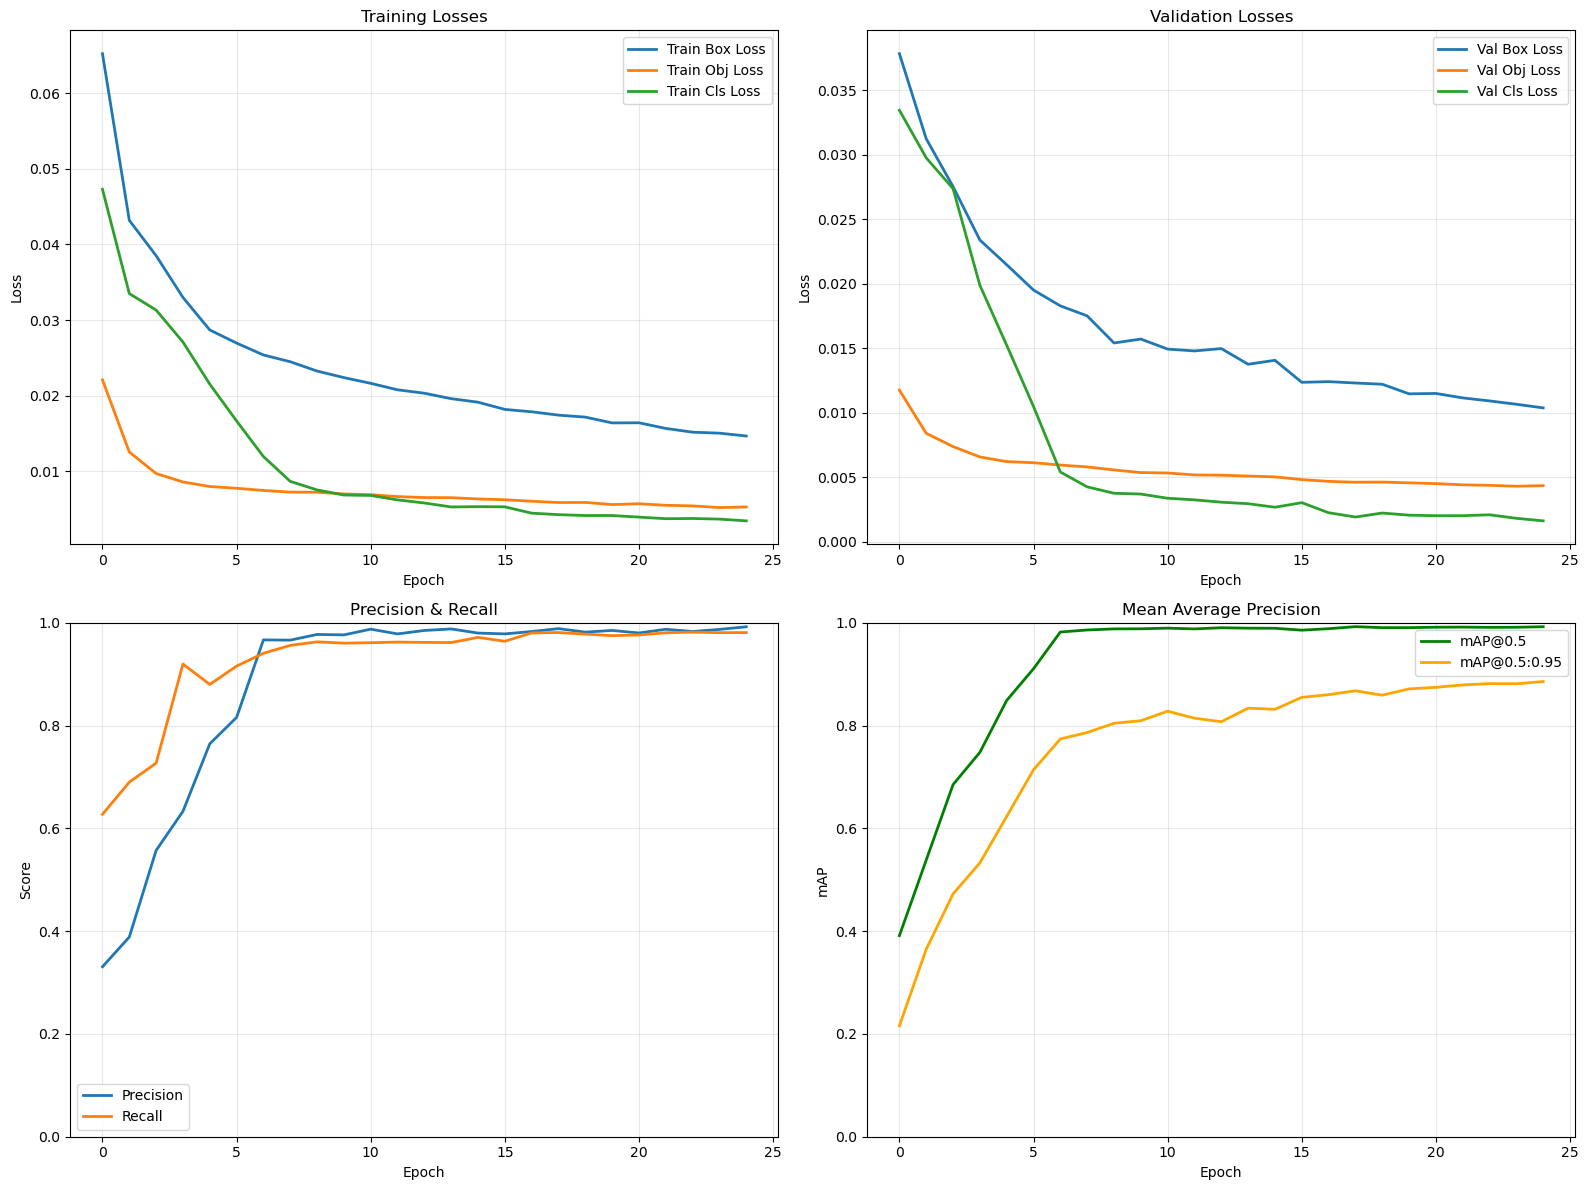


TRAINING PIPELINE COMPLETE!

Next steps:
  1. Review training results in: C:\Users\lokes\Desktop\ironhack\final_project\dataset\dataset\runs\nutrigreen_exp
  2. Run evaluation notebook: nutrigreen_evaluation.ipynb
  3. Use the trained model in Streamlit app



In [18]:
# ============================================================================
# 8. VISUALIZE TRAINING CURVES
# ============================================================================
print("\n" + "=" * 80)
print("VISUALIZING TRAINING CURVES")
print("=" * 80)

import matplotlib.pyplot as plt
import seaborn as sns

if (exp_dir / 'results.csv').exists():
    results = pd.read_csv(exp_dir / 'results.csv')
    results.columns = results.columns.str.strip()
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Loss curves
    axes[0, 0].plot(results['train/box_loss'], label='Train Box Loss', linewidth=2)
    axes[0, 0].plot(results['train/obj_loss'], label='Train Obj Loss', linewidth=2)
    axes[0, 0].plot(results['train/cls_loss'], label='Train Cls Loss', linewidth=2)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].set_title('Training Losses')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Validation losses
    axes[0, 1].plot(results['val/box_loss'], label='Val Box Loss', linewidth=2)
    axes[0, 1].plot(results['val/obj_loss'], label='Val Obj Loss', linewidth=2)
    axes[0, 1].plot(results['val/cls_loss'], label='Val Cls Loss', linewidth=2)
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].set_title('Validation Losses')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Precision and Recall
    axes[1, 0].plot(results['metrics/precision'], label='Precision', linewidth=2)
    axes[1, 0].plot(results['metrics/recall'], label='Recall', linewidth=2)
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Score')
    axes[1, 0].set_title('Precision & Recall')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_ylim([0, 1])
    
    # mAP curves
    axes[1, 1].plot(results['metrics/mAP_0.5'], label='mAP@0.5', linewidth=2, color='green')
    axes[1, 1].plot(results['metrics/mAP_0.5:0.95'], label='mAP@0.5:0.95', linewidth=2, color='orange')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('mAP')
    axes[1, 1].set_title('Mean Average Precision')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_ylim([0, 1])
    
    plt.tight_layout()
    plt.savefig(exp_dir / 'training_curves.png', dpi=300, bbox_inches='tight')
    print(f"\n✓ Training curves saved to: {exp_dir / 'training_curves.png'}")
    plt.show()

print("\n" + "=" * 80)
print("TRAINING PIPELINE COMPLETE!")
print("=" * 80)
print(f"\nNext steps:")
print(f"  1. Review training results in: {exp_dir}")
print(f"  2. Run evaluation notebook: nutrigreen_evaluation.ipynb")
print(f"  3. Use the trained model in Streamlit app")
print("\n" + "=" * 80)